####  Import necessary libraries

In [256]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Hide all warnings
warnings.filterwarnings("ignore")

#### Read loan data from loan.csv file.

In [257]:
# Read dataset
loan_data_original = pd.read_csv("loan.csv", low_memory=False)

##### Total rows and columns

In [258]:
print("Rows, Columns : ",loan_data_original.shape)

Rows, Columns :  (39717, 111)


##### Remove duplicate rows from dataset

In [259]:
# Remove duplicate rows.
# lets identify any duplicate rows in the dataset.
loan_data_original = loan_data_original.drop_duplicates()
print("Rows, Columns : ",loan_data_original.shape)

Rows, Columns :  (39717, 111)


##### No duplicate rows found.

In [260]:
#### What are the different values in loan_status
loan_data_original["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

##### Remove rows with loan status = "Current"

In [261]:
#Loan status = "Current" can't be considered , Since they are active loans.So lets remove them from target dataset.
loan_data = loan_data_original[loan_data_original["loan_status"].isin(["Fully Paid","Charged Off"])]
print(loan_data["loan_status"].value_counts())
print("\n*********************")
print("Shape : ",loan_data.shape)

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

*********************
Shape :  (38577, 111)


In [262]:
# % of rows deleted from the original dataset. This is just to know we are not deleting significant records.
round(((loan_data_original.shape[0]-loan_data.shape[0]) /loan_data_original.shape[0])*100,2)

2.87

#### Review all columns in dataset

###### Lets remove columns with all null values.

In [263]:
null_percent = loan_data.isna().sum()*100/len(loan_data)
all_null_value_columns = loan_data.columns[null_percent == 100].tolist()
print("Total columns with all null values : ",len(all_null_value_columns))

Total columns with all null values :  55


In [264]:
loan_data = loan_data.dropna(axis="columns", how="all")

In [265]:
loan_data.shape

(38577, 56)

#### 55 columns have all null values. So deleted those columns from dataframe.
     So current shape of dataframe is : (38577, 56)

#### Dropping columns which has same value for all rows. So using nunique > 1 to filter rows with same value.

In [266]:
loan_data.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq      

In [267]:
# 11 columns are dropped. New dataset will contain the remaining 45 columns.
loan_data = loan_data.loc[:, loan_data.nunique() > 1]

In [268]:
loan_data.shape

(38577, 45)

##### Reviewed these 45 columns based on below parameters:
- Will this column participate during loan approval process
- Is it only to maintain the balance amounts and next payment dates
- Is it only used to record any text/url etc

In [269]:
loan_data = loan_data.drop(columns = ["id","collection_recovery_fee", "delinq_2yrs", "desc", "emp_title","inq_last_6mths","last_pymnt_amnt","last_pymnt_d",
"mths_since_last_delinq","mths_since_last_record","recoveries","revol_bal","revol_util",
"total_pymnt_inv","title","url", "open_acc","total_acc","total_rec_late_fee","earliest_cr_line", "total_rec_prncp", "total_rec_int","last_credit_pull_d"], axis = 1)

In [270]:
# Current shape of the data set.
loan_data.shape

(38577, 22)

#### list of columns after cleanup - Phase-I  ( 22 Columns)

In [271]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec',
       'total_pymnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [272]:
loan_data_null_mean = (100* loan_data.isna().mean().sort_values(ascending = False))
loan_data_null_mean

emp_length              2.677761
pub_rec_bankruptcies    1.806776
verification_status     0.000000
total_pymnt             0.000000
pub_rec                 0.000000
dti                     0.000000
addr_state              0.000000
zip_code                0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
member_id               0.000000
loan_amnt               0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
funded_amnt_inv         0.000000
funded_amnt             0.000000
annual_inc              0.000000
dtype: float64

In [273]:
# Removed emp_length & pub_rec_bankruptcies null records from dataset.

loan_data.dropna(subset = ["emp_length"], inplace=True)
loan_data.dropna(subset = ["pub_rec_bankruptcies"], inplace=True)
loan_data_null_mean = (100* loan_data.isna().mean().sort_values(ascending = False))
print(loan_data_null_mean)
print("Dataset : ", loan_data.shape)

member_id               0.0
loan_amnt               0.0
total_pymnt             0.0
pub_rec                 0.0
dti                     0.0
addr_state              0.0
zip_code                0.0
purpose                 0.0
loan_status             0.0
issue_d                 0.0
verification_status     0.0
annual_inc              0.0
home_ownership          0.0
emp_length              0.0
sub_grade               0.0
grade                   0.0
installment             0.0
int_rate                0.0
term                    0.0
funded_amnt_inv         0.0
funded_amnt             0.0
pub_rec_bankruptcies    0.0
dtype: float64
Dataset :  (36847, 22)


In [274]:
pd.set_option('display.max_columns',None)
loan_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,total_pymnt,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,5863.155187,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,1008.710000,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,3005.666844,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,12231.890000,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,5632.210000,0.0


In [275]:
#### Reset the index to member_id 
loan_data.set_index("member_id", inplace=True)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,total_pymnt,pub_rec_bankruptcies
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,5863.155187,0.0
1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,1008.710000,0.0
1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,3005.666844,0.0
1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,12231.890000,0.0
1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,5632.210000,0.0


In [276]:
# Remove the % from int rate.
loan_data["int_rate"] = loan_data["int_rate"].str.strip("%").astype(float)

In [299]:
# Remove "months" from term field.
loan_data["term"] = loan_data["term"].str.strip("months").astype(float)

In [278]:
# Issue_d is a column with Month-Year. Adding 2 new columns to separate month and year.
loan_data["issued_year"] = pd.to_datetime(loan_data["issue_d"], format='%b-%y').dt.year
loan_data["issued_month"] = pd.to_datetime(loan_data["issue_d"], format='%b-%y').dt.month

In [279]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec', 'total_pymnt',
       'pub_rec_bankruptcies', 'issued_year', 'issued_month'],
      dtype='object')

In [280]:
# Now lets remove the outliers from the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 1296599 to 112493
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36847 non-null  int64  
 1   funded_amnt           36847 non-null  int64  
 2   funded_amnt_inv       36847 non-null  float64
 3   term                  36847 non-null  object 
 4   int_rate              36847 non-null  float64
 5   installment           36847 non-null  float64
 6   grade                 36847 non-null  object 
 7   sub_grade             36847 non-null  object 
 8   emp_length            36847 non-null  object 
 9   home_ownership        36847 non-null  object 
 10  annual_inc            36847 non-null  float64
 11  verification_status   36847 non-null  object 
 12  issue_d               36847 non-null  object 
 13  loan_status           36847 non-null  object 
 14  purpose               36847 non-null  object 
 15  zip_code         

In [281]:
loan_data.shape

(36847, 23)

In [300]:
def calculcateIQR(colName):
    #Calculate IQR
    Q1 = loan_data[colName].quantile(0.25)
    Q3 = loan_data[colName].quantile(0.75)
    IQR = Q3 - Q1

    print("Q1 : {} Q3 : {} IQR : {}".format(Q1,Q3,IQR))

    # lower and upper bounds for outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound,upper_bound

In [303]:
# Handle outliers from loan amount

#Calculate IQR
lower_bound,upper_bound =  calculcateIQR("loan_amnt")

Q1 : 5000.0 Q3 : 14300.0 IQR : 9300.0


#### Lets remove the rows from dataset which are outside lower and upper bounds.

In [304]:
loan_data = loan_data[(loan_data["loan_amnt"] > lower_bound) & (loan_data["loan_amnt"] < upper_bound)]
loan_data.shape

(33984, 23)

In [305]:
# Lets do the outlier removal for annual income.(annual_inc)  
# we can write a common function, Since it's only 2 columns,  Duplicated the code.

lower_bound,upper_bound =  calculcateIQR("annual_inc")
loan_data = loan_data[(loan_data["annual_inc"] > lower_bound) & (loan_data["annual_inc"] < upper_bound)]
loan_data.shape

Q1 : 40000.0 Q3 : 76000.0 IQR : 36000.0


(33518, 23)

##### Remove all non-numeric characters from the 'emp_length' .

In [306]:
import re

# Remove all non-numeric characters from the 'emp_length'
loan_data["emp_length"] = loan_data["emp_length"].str.replace(r'\D','',regex=True)

In [307]:
# Final data after complete cleanup. We will use this for further analysis.
loan_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,total_pymnt,pub_rec_bankruptcies,issued_year,issued_month
member_id,,,,,,,,,,,,,,,,,,,,,,,
624221,8000,8000,7000.0,36.0,7.51,248.88,A,A4,10,OWN,25000.0,Not Verified,Feb-10,Fully Paid,credit_card,321xx,FL,10.99,0,8577.255145,0.0,2010,2
751525,9000,9000,8950.0,60.0,10.38,192.92,B,B1,10,MORTGAGE,62000.0,Not Verified,Sep-10,Fully Paid,car,400xx,KY,6.02,0,10626.863410,0.0,2010,9
751566,5000,5000,5000.0,36.0,11.86,165.74,B,B5,2,OWN,30996.0,Not Verified,Sep-10,Fully Paid,home_improvement,199xx,DE,9.76,0,5803.244903,0.0,2010,9
751487,10000,10000,9900.0,36.0,11.12,327.96,B,B3,4,MORTGAGE,43344.0,Not Verified,Sep-10,Fully Paid,credit_card,940xx,CA,10.99,0,11807.392580,0.0,2010,9
733547,4000,4000,4000.0,36.0,10.75,130.49,B,B2,1,RENT,52000.0,Not Verified,Aug-10,Fully Paid,moving,225xx,VA,11.15,0,4697.588920,0.0,2010,8



## Univariate Analysis
 

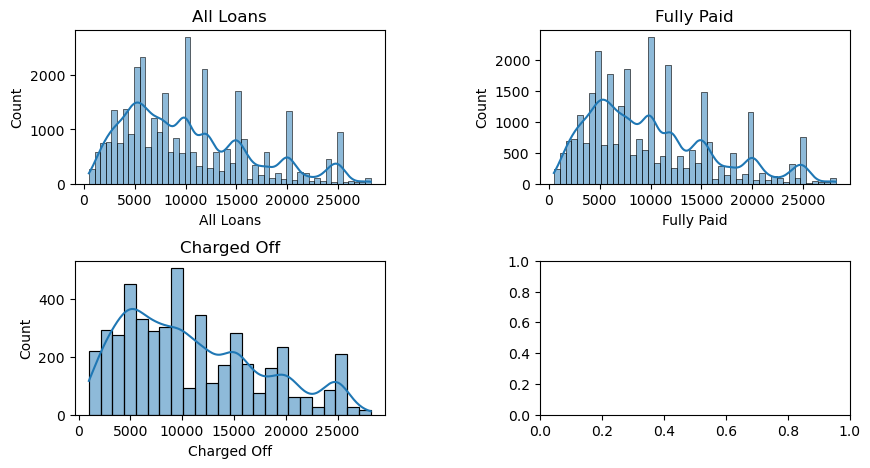

In [308]:
# Plot a histogram for loan_amount across All Loans / Fully Paid / Charged Off
# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.histplot(ax = axes[0][0], data=loan_data, x="loan_amnt", kde=True)
axes[0][0].set_title("All Loans")
axes[0][0].set_xlabel("All Loans")
sns.histplot(ax = axes[0][1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="loan_amnt", kde=True)
axes[0][1].set_title("Fully Paid")
axes[0][1].set_xlabel("Fully Paid")
sns.histplot(ax = axes[1][0], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="loan_amnt", kde=True)
axes[1][0].set_title("Charged Off")
axes[1][0].set_xlabel("Charged Off")
plt.show()

#### Analysis : The loan amounts taken by "charged off" customers is more or less same as "fully paid". So we can't conclude anything purely based on loan amount.

Category: All Loans , 25th Percentile: 40000.0 , 50th Percentile: 55400.0
Category: Fully Paid , 25th Percentile: 40000.0 , 50th Percentile: 57000.0
Category: Charged Off , 25th Percentile: 36404.21 , 50th Percentile: 50400.0


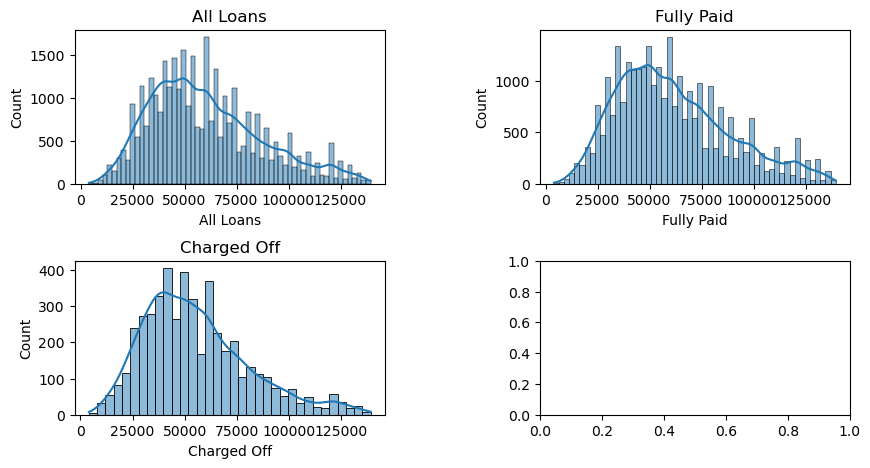

In [288]:
# Plot a histogram for loan_amount across Fully Paid / Charged Off / Total amoumt. 

# Calculate percentiles
print("Category: {} , 25th Percentile: {} , 50th Percentile: {}".format("All Loans", 
      loan_data['annual_inc'].quantile(0.25), 
      loan_data['annual_inc'].quantile(0.50)))
    
print("Category: {} , 25th Percentile: {} , 50th Percentile: {}".format("Fully Paid", 
      loan_data[loan_data["loan_status"] == "Fully Paid"]["annual_inc"].quantile(0.25), 
      loan_data[loan_data["loan_status"] == "Fully Paid"]["annual_inc"].quantile(0.50)))

print("Category: {} , 25th Percentile: {} , 50th Percentile: {}".format("Charged Off", 
      loan_data[loan_data["loan_status"] == "Charged Off"]["annual_inc"].quantile(0.25), 
      loan_data[loan_data["loan_status"] == "Charged Off"]["annual_inc"].quantile(0.50)))

# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.histplot(ax = axes[0][0], data=loan_data, x="annual_inc", kde=True)
axes[0][0].set_title("All Loans")
axes[0][0].set_xlabel("All Loans")
sns.histplot(ax = axes[0][1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="annual_inc" , kde=True)
axes[0][1].set_title("Fully Paid")
axes[0][1].set_xlabel("Fully Paid")
sns.histplot(ax = axes[1][0], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="annual_inc", kde=True)
axes[1][0].set_title("Charged Off")
axes[1][0].set_xlabel("Charged Off")
plt.show()

#### Analysis : The average income of the charged off customer is less than the overall annual income and fully paid customers.
- Majority of the customer who could not pay loans is earning less than 50000
- The anuual income of the "charged off" customers above 75000 is significantly low compared to fully paid.

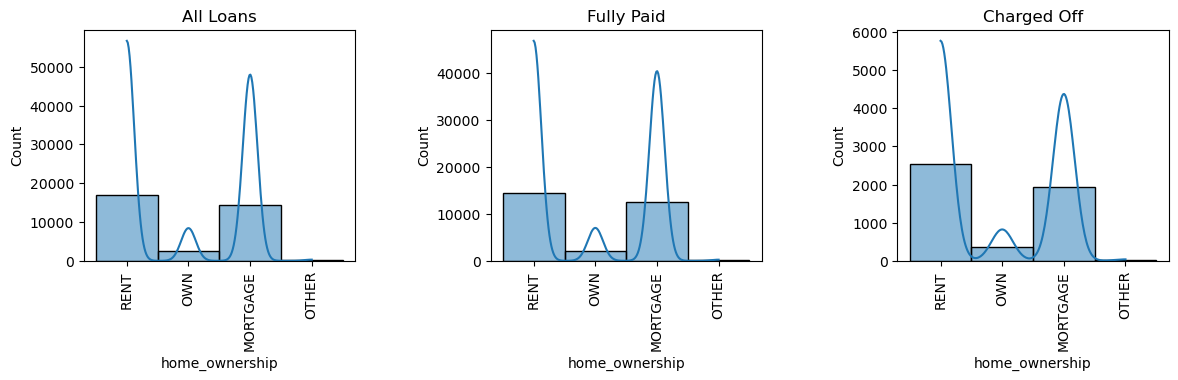

In [289]:
#### home_ownership

# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.histplot(ax = axes[0], data=loan_data, x="home_ownership", kde=True)
axes[0].set_title("All Loans")
axes[0].tick_params(axis='x',rotation=90)
sns.histplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="home_ownership" , kde=True)
axes[1].set_title("Fully Paid")
axes[1].tick_params(axis='x',rotation=90)
sns.histplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="home_ownership", kde=True)
axes[2].set_title("Charged Off")
axes[2].tick_params(axis='x',rotation=90)
plt.show()

#####  Analysis : Significant customers who defaulted loan are staying in RENTED accomations compated to Fully Paid.

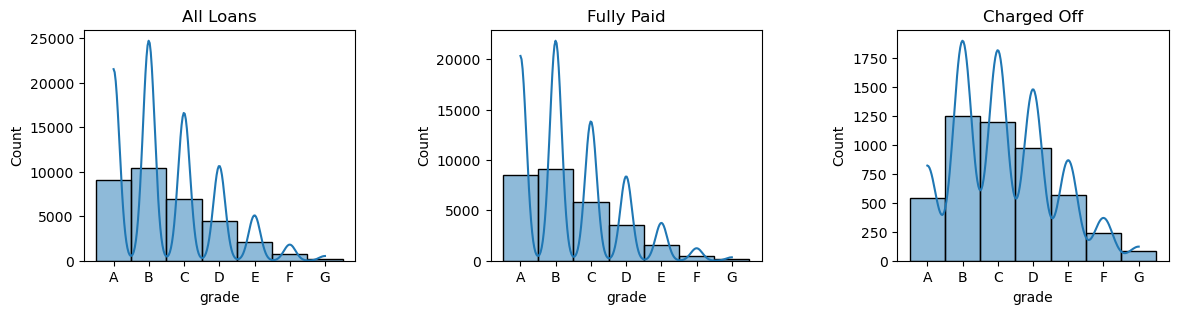

In [290]:
##grade

# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loan_data = loan_data.sort_values("grade")

sns.histplot(ax = axes[0], data=loan_data, x="grade", kde=True)
axes[0].set_title("All Loans")
sns.histplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="grade" , kde=True)
axes[1].set_title("Fully Paid")
sns.histplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="grade", kde=True)
axes[2].set_title("Charged Off")
plt.show()

##### Analysis : Customer with grades B,C,D defaulted loans compared A,E,F,G.

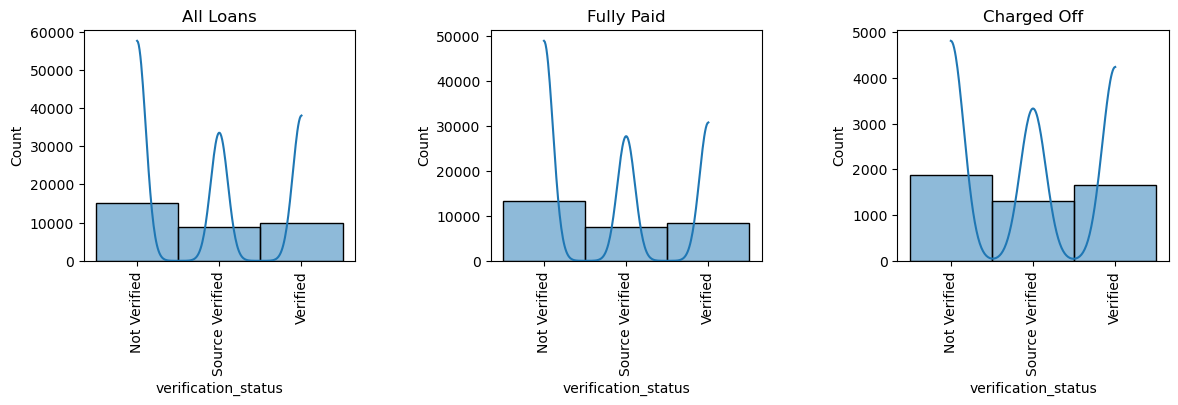

In [291]:
##verification_status

# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loan_data = loan_data.sort_values("verification_status")

sns.histplot(ax = axes[0], data=loan_data, x="verification_status", kde=True)
axes[0].set_title("All Loans")
axes[0].tick_params(axis='x',rotation=90)
sns.histplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="verification_status" , kde=True)
axes[1].set_title("Fully Paid")
axes[1].tick_params(axis='x',rotation=90)
sns.histplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="verification_status", kde=True)
axes[2].set_title("Charged Off")
axes[2].tick_params(axis='x',rotation=90)
plt.show()

##### Analysis : % of customers whose "Source verified" defaulted less.

##  Bivariate Analysis

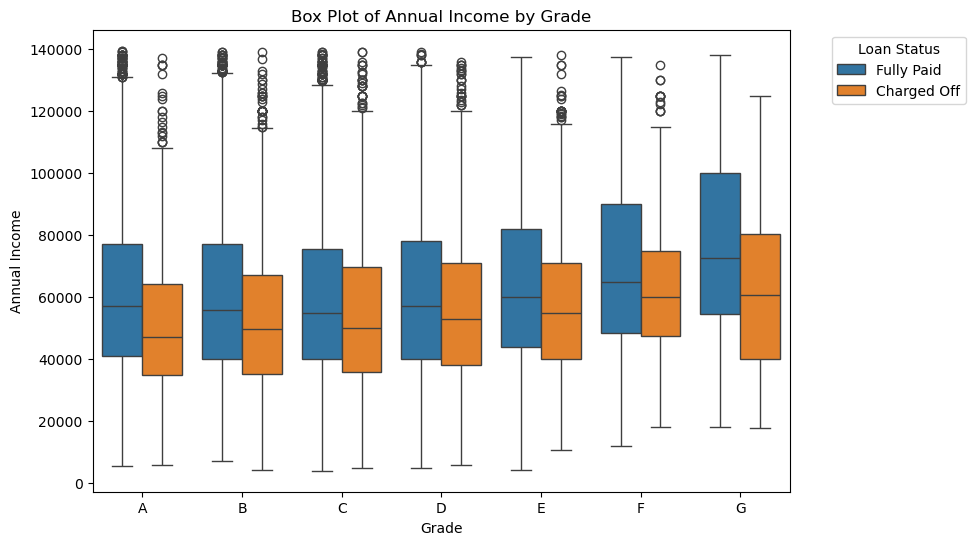

In [292]:
# Lets consider annual income vs groups (grouped by loan_status)

# Set the figure size
plt.figure(figsize=(9, 6))
sns.boxplot(data=loan_data, x="grade", y="annual_inc", hue="loan_status")
plt.title('Box Plot of Annual Income by Grade')
plt.xlabel('Grade')
plt.ylabel('Annual Income')
# Adjust legend position
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Customers with grade "G" defaulted more loans compared to other grades, Even though their annual salary is higher than other grades.

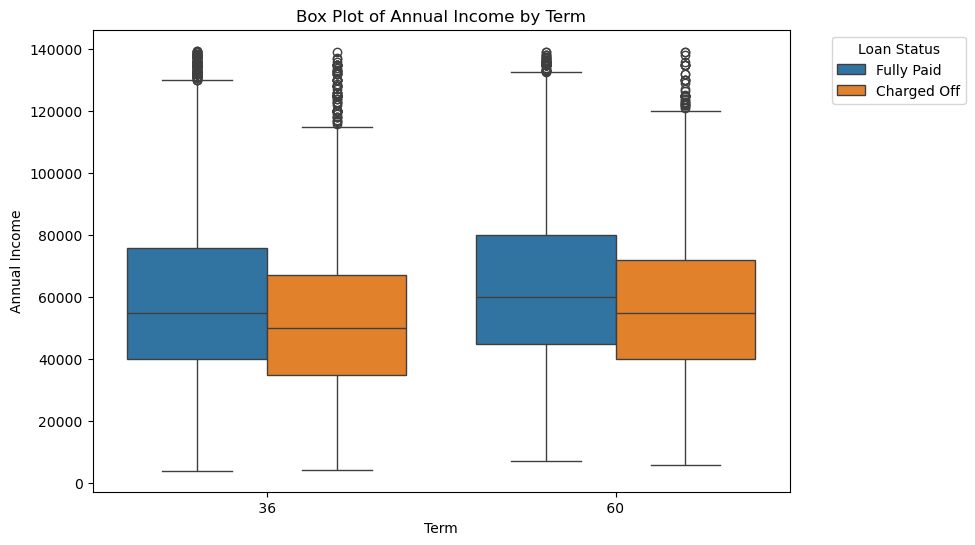

In [294]:
# Lets consider annual income vs Term (grouped by loan_status)

# Set the figure size
plt.figure(figsize=(9, 6))
sns.boxplot(data=loan_data, x="term", y="annual_inc", hue="loan_status")
plt.title('Box Plot of Annual Income by Term')
plt.xlabel('Term')
plt.ylabel('Annual Income')
# Adjust legend position
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

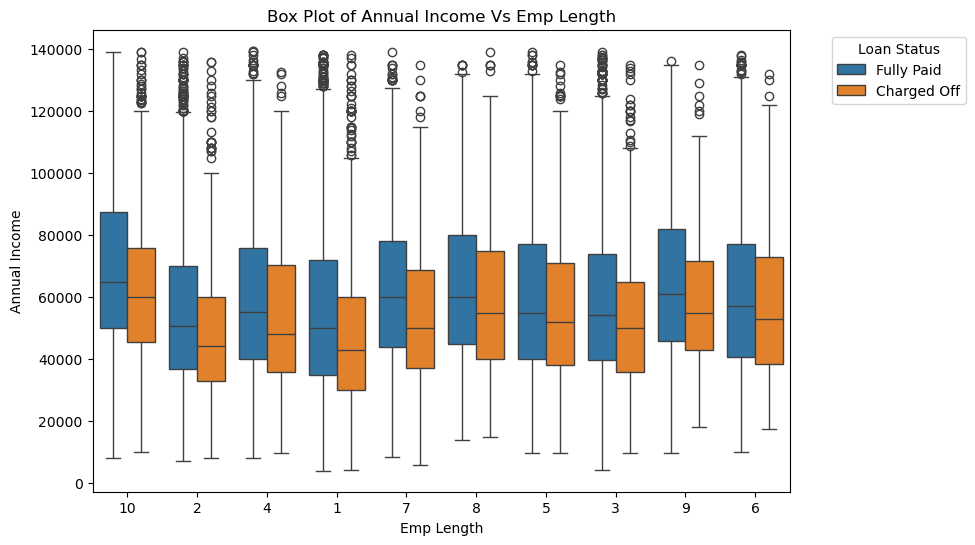

In [295]:
# Lets consider annual income vs Term (grouped by loan_status)

plt.figure(figsize=(9, 6))
sns.boxplot(data=loan_data, x="emp_length", y="annual_inc", hue="loan_status")
plt.title('Box Plot of Annual Income Vs Emp Length')
plt.xlabel('Emp Length')
plt.ylabel('Annual Income')
# Adjust legend position
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Analysis : Tenure of 30/60 months did not have any impact on defaulting loans.

## Multivariate analysis

<Axes: >

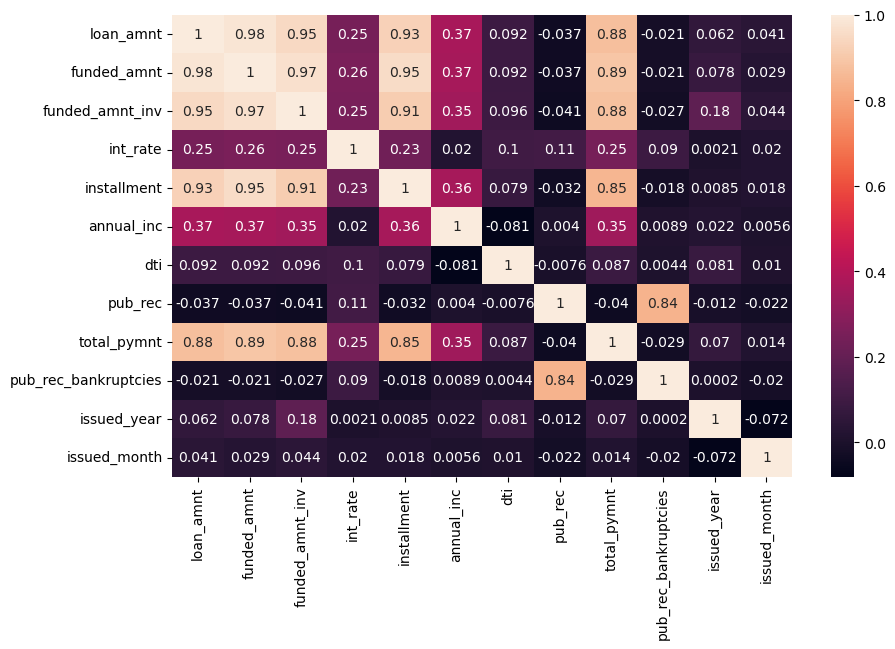

In [298]:
plt.figure(figsize=(10,6))
sns.heatmap(loan_data.corr(numeric_only=True), annot=True)

- Loan amount , Funded amout, Total payment, Installment are all positvely correlated
- Amounts and public records are negatively correlated
- other attributes does not have any dependent impact on others.